In [23]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [24]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [25]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [1]:
import pandas as pd

In [3]:
# read Eviction
df = pd.read_csv('Evictions_20230401.csv')

In [7]:
# count how many uniqe Marshal First Name and Marshal Last Name
df.groupby(['Marshal First Name', 'Marshal Last Name']).size().reset_index(name='count').sort_values('count', ascending=False)

,Marshal First Name,Marshal Last Name,count
12,Justin,Grossman,3348
4,David,Smith,2229
19,Thomas,Bia,1217
5,Edward,Guida,1174
10,Ileana,Rivera,1152
17,Robert,Renzulli,1112
3,Darlene,Barone,1016
7,George,"Essock, Jr.",626
8,Henry,Daley,596
6,Gary,Rose,555


In [26]:
%%R
# read newyork_map.csv
df = read_csv('newyork_map.csv')

Rows: 300 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): month_date, race
dbl (9): id, month_filings, month_rate, month_rate_scale_max, month_diff, pc...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [27]:
%%R
# mutate execute_rate = execute_count / (month_filings/month_rate)
df = df %>% mutate(execute_rate = execute_count / (month_filings/month_rate))

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 123 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 122 rows containing missing values or values outside the scale range
(`geom_point()`). 



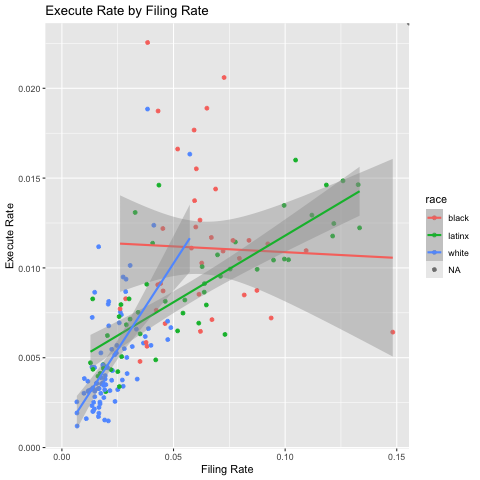

In [43]:
%%R
# plot the execute_rate by month_rate
df %>% 
ggplot(aes(x = month_rate, y = execute_rate, color=race)) +
geom_point() +
geom_smooth(method="lm") +
labs(title = 'Execute Rate by Filing Rate', x = 'Filing Rate', y = 'Execute Rate') 

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 13 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`). 



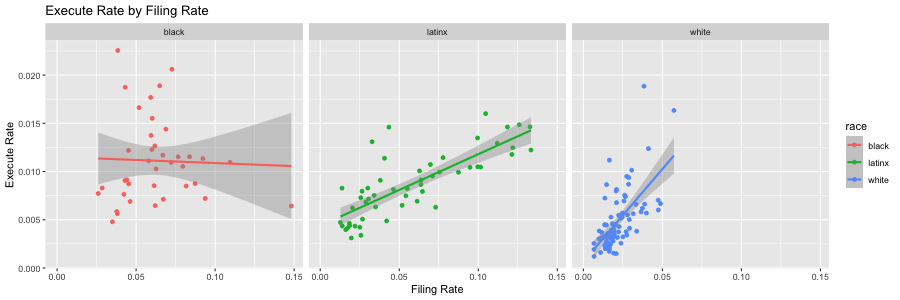

In [46]:
%%R -w 900 -h 300
# plot the execute_rate by month_rate
df %>% 
# select race == black, white, latinx
filter(race %in% c('black', 'white', 'latinx')) %>%
ggplot(aes(x = month_rate, y = execute_rate, color=race)) +
geom_point() +
geom_smooth(method = 'lm') +
facet_wrap(~race) +
labs(title = 'Execute Rate by Filing Rate', x = 'Filing Rate', y = 'Execute Rate') 

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'



Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

In addition: Warning messages:
1: Removed 110 rows containing non-finite outside the scale range
(`stat_smooth()`). 
2: Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`). 
3: Removed 110 rows containing non-finite outside the scale range
(`stat_smooth()`). 
4: Removed 110 rows containing missing values or values outside the scale range
(`geom_point()`). 
5: Removed 123 rows containing non-finite outside the scale range
(`stat_smooth()`). 
6: Removed 123 rows containing missing values or values outside the scale range
(`geom_point()`). 
7: Removed 123 rows containing non-finite outside the scale range
(`stat_smooth()`). 
8: Removed 123 rows containing missing values or values outside the scale range
(`geom_point()`). 


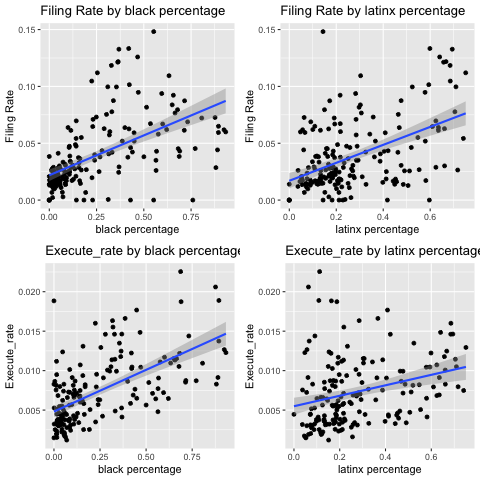

In [41]:
%%R
library(gridExtra)

# create the first plot
p1 <- df %>% 
ggplot(aes(x = pct_black, y = month_rate)) +
geom_point() +
geom_smooth(method = 'lm')+
labs(title = 'Filing Rate by black percentage', x = 'black percentage', y = 'Filing Rate')

p2 <- df %>% 
ggplot(aes(x = pct_latinx, y = month_rate)) +
geom_point() +
geom_smooth(method = 'lm')+
labs(title = 'Filing Rate by latinx percentage', x = 'latinx percentage', y = 'Filing Rate')

p3 <- df %>% 
ggplot(aes(x = pct_black, y = execute_rate)) +
geom_point() +
geom_smooth(method = 'lm')+
labs(title = 'Execute_rate by black percentage', x = 'black percentage', y = 'Execute_rate')

p4 <- df %>% 
ggplot(aes(x = pct_latinx, y = execute_rate)) +
geom_point() +
geom_smooth(method = 'lm')+
labs(title = 'Execute_rate by latinx percentage', x = 'latinx percentage', y = 'Execute_rate')

# arrange the plots in one cell
grid.arrange(p1, p2,p3, p4, ncol=2)